In [7]:
import pandas as pd
import numpy as np
import pickle

# Remplace par le nom exact de ton fichier
file_path = 'data/train/mhealth_train_data_stage1.pkl'

print(f"Type de l'objet : {type(data)}")

if isinstance(data, list):
    print(f"Nombre d'éléments : {len(data)}")
    print(f"Taille du 1er élément : {np.shape(data[0])}")
    print(f"Taille du 2ème élément : {np.shape(data[1])}")
elif isinstance(data, dict):
    print("Clés du dictionnaire :", data.keys())
    for k, v in data.items():
        if hasattr(v, '__len__'):
            print(f"Clé '{k}' : longueur {len(v)}")

Type de l'objet : <class 'list'>
Nombre d'éléments : 9558
Taille du 1er élément : (97, 15)
Taille du 2ème élément : (70, 15)


In [8]:
import pandas as pd
import numpy as np

# On crée une liste de DataFrames, un pour chaque séquence
dfs = []
for i, seq in enumerate(data):
    temp_df = pd.DataFrame(seq)
    temp_df['sequence_id'] = i  # Pour savoir à quelle séquence appartient chaque ligne
    dfs.append(temp_df)

# On fusionne tout en un seul grand tableau
df = pd.concat(dfs, ignore_index=True)

# Optionnel : nommer les colonnes si tu les connais (MHealth a souvent Accel, Gyro, etc.)
# Si la dernière colonne est le label (activité), on peut la renommer
df.rename(columns={df.columns[14]: 'label'}, inplace=True) 

print(f"DataFrame créé ! Forme totale : {df.shape}")
print(df.head())

DataFrame créé ! Forme totale : (480678, 16)
        0         1        2        3       4        5        6        7  \
0 -9.1542  0.636840  0.89942  0.18314 -9.4906 -6.48310 -0.26716 -0.38649   
1 -8.6233  0.357780  1.05330  0.82168 -7.3844 -3.78810 -0.34323 -0.49531   
2 -7.8995  0.025462  0.66545  0.72112 -4.9427 -1.19830 -0.34323 -0.49531   
3 -7.1550  0.172290  0.86814  0.77815 -3.6571 -1.35220 -0.34323 -0.49531   
4 -6.3325  0.462560  0.94689  1.08600 -2.8553 -0.38191 -0.40445 -0.51220   

          8       9      10      11       12       13     label  sequence_id  
0  0.174850 -3.4535 -10.677  2.3412 -0.41176 -0.40452  0.012931            0  
1  0.013752 -3.6900 -10.950  1.9837 -0.37059 -0.41478 -0.049569            0  
2  0.013752 -3.5923 -10.209  2.1458 -0.37059 -0.41478 -0.049569            0  
3  0.013752 -3.4404 -10.153  1.7319 -0.37059 -0.41478 -0.049569            0  
4 -0.084479 -3.3067  -9.712  1.7956 -0.37059 -0.41478 -0.049569            0  


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Configuration du style pour que ça soit "plus sympa" ---
# Utilisation du thème Seaborn pour un look moderne
sns.set_theme(style="whitegrid", context="talk")
pal = sns.color_palette("viridis", as_cmap=True) # Une belle palette de couleurs

# --- Choix d'un exemple intéressant ---
# On cherche un segment qui a une tendance claire (ex: "increasing")
# pour que le graphique soit parlant.
idx_to_plot = 0
for i, item in enumerate(stage1_dataset):
    if "increasing" in item["text_description"] and "high volatility" in item["text_description"]:
        idx_to_plot = i
        break

# Récupération des données du segment choisi
segment_data = np.array(stage1_dataset[idx_to_plot]["sensor_values"])
text_desc = stage1_dataset[idx_to_plot]["text_description"]
time_steps = np.arange(len(segment_data))

# --- Création du Graphique ---
plt.figure(figsize=(14, 7)) # Grand format

# 1. Tracer la ligne avec un dégradé de couleur selon l'amplitude
# On utilise un "scatter" pour le dégradé et un "plot" pour la ligne
plt.plot(time_steps, segment_data, color='gray', alpha=0.5, linewidth=1, zorder=1)
sc = plt.scatter(time_steps, segment_data, c=segment_data, cmap='viridis', s=70, zorder=2)

# 2. Ajouter une zone d'ombre sous la courbe pour le volume
plt.fill_between(time_steps, segment_data, segment_data.min(), color=pal(0.6), alpha=0.2)

# 3. Ajouter la DESCRIPTION GÉNÉRÉE dans une belle boîte
# C'est ça le plus important : montrer le lien Texte <-> Données
textstr = f"🤖 AUTO-GENERATED DESCRIPTION:\n\n'{text_desc}'"
props = dict(boxstyle='round,pad=1', facecolor='#f0fcfc', alpha=0.9, edgecolor='#2c3e50', linewidth=2)
plt.text(0.02, 0.95, textstr, transform=plt.gca().transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

# --- Habillage ---
plt.title("Stage 1 Result: Aligning Sensor Data with Language", fontsize=18, weight='bold', pad=20)
plt.xlabel("Time Steps (Window Index)", fontsize=12)
plt.ylabel("Sensor Amplitude", fontsize=12)

# Ajouter une barre de couleur pour le style
cbar = plt.colorbar(sc)
cbar.set_label('Signal Intensity')

# Nettoyer les bords
sns.despine(trim=True)
plt.tight_layout()

print(f"Visualisation du segment index {idx_to_plot}")
plt.show()

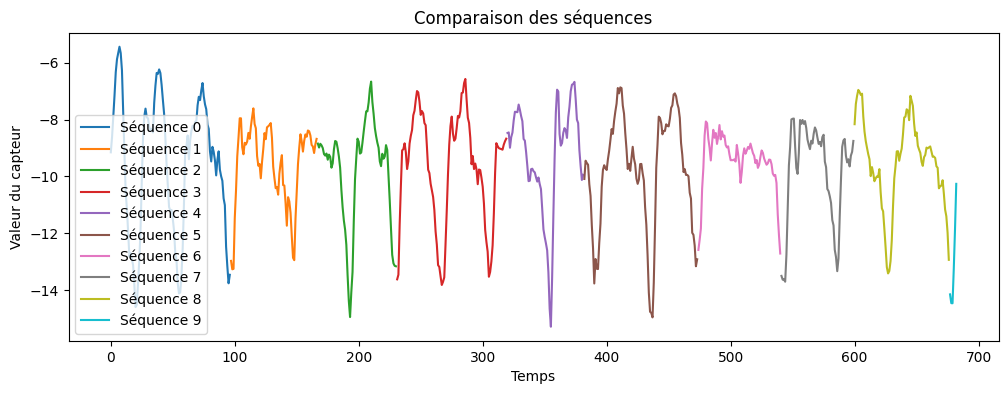

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# For loop to plot 10 sequences
for seq_id in range(10):
    seq_data = df[df['sequence_id'] == seq_id]
    plt.plot(seq_data.index, seq_data[0], label=f'Séquence {seq_id}')

# Axes 
plt.xlabel("Temps")
plt.ylabel("Valeur du capteur")

plt.title("Comparaison des séquences")
plt.legend()
plt.show()

Description générée : The signal is stable with high volatility.
Nombre de paires alignées créées : 9613
Exemple de paire : {'sensor_values': [-9.1542, -8.6233, -7.8995, -7.155, -6.3325, -5.8785, -5.659, -5.4389, -5.6619, -6.2722, -7.7408, -9.1765, -10.56, -11.139, -11.968, -12.823, -12.697, -12.902, -13.126, -13.829, -14.599, -14.51, -13.732, -12.931, -11.853, -10.147, -8.6601, -7.8984, -7.6169, -7.922, -7.9579, -8.264, -8.3847, -8.3238, -8.4558, -7.4147, -6.8143, -6.3619, -6.3929, -6.2376, -6.3641, -6.7832, -7.3032, -7.7979, -8.6358, -9.5984, -10.311, -11.081, -11.195, -11.18], 'text_description': 'The signal is stable with high volatility.'}
Visualisation du segment index 5


C:\Users\thoma\AppData\Local\Temp\ipykernel_27704\2044804614.py:107: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\thoma\Documents\GitHub\SensorLLM\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


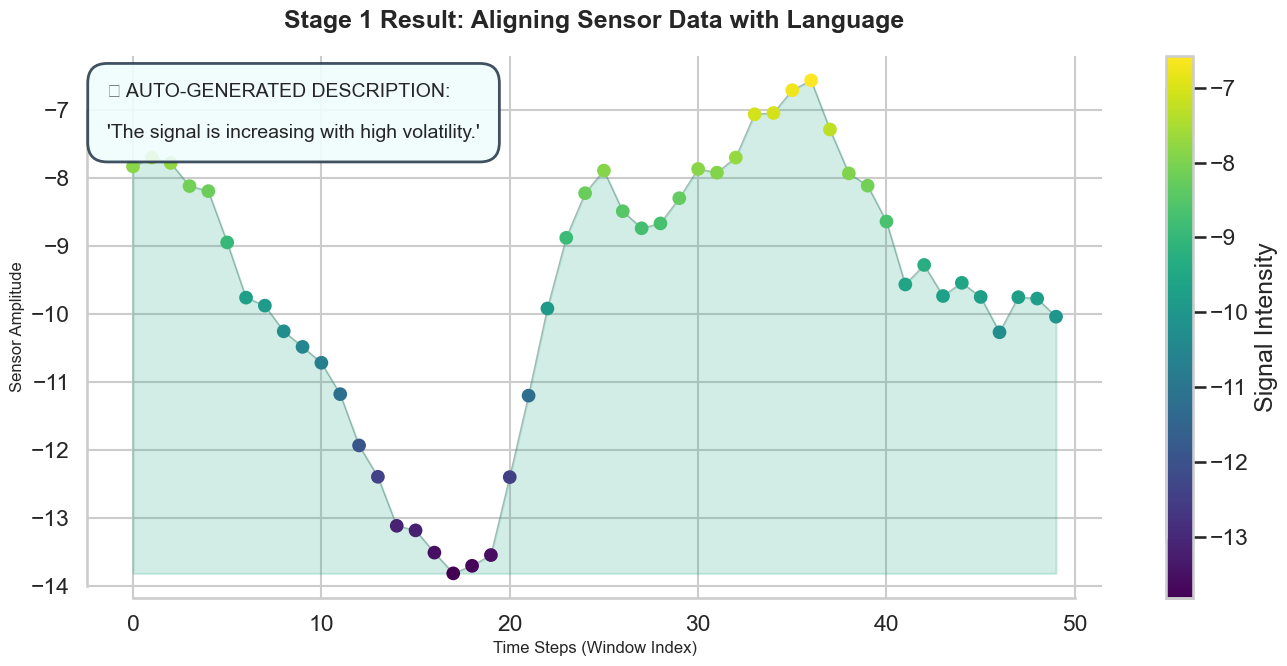

In [ ]:
import numpy as np

def generate_text_description(segment):
    # Calcul de la pente globale via une régression linéaire simple
    x = np.arange(len(segment))
    slope, _ = np.polyfit(x, segment, 1)
    
    # Calcul de la variabilité (standard deviation)
    std = np.std(segment)
    
    # Logique de description textuelle
    if abs(slope) < 0.01:
        trend = "stable"
    elif slope > 0:
        trend = "increasing"
    else:
        trend = "decreasing"
        
    if std > 0.5:
        dynamic = "with high volatility"
    else:
        dynamic = "with low noise"
        
    return f"The signal is {trend} {dynamic}."

# Test sur un petit bout de tes données
example_segment = df.iloc[0:50, 0].values # 50 premiers points de la colonne 0
description = generate_text_description(example_segment)
print(f"Description générée : {description}")

def prepare_stage1_data(data, window_size=50):
    aligned_pairs = []
    
    # On parcourt les données par fenêtres
    for i in range(0, len(data) - window_size, window_size):
        segment = data[i:i+window_size]
        
        # On génère la description pour ce segment
        text_label = generate_text_description(segment)
        
        # On stocke le couple (Numérique, Texte)
        aligned_pairs.append({
            "sensor_values": segment.tolist(),
            "text_description": text_label
        })
        
    return aligned_pairs

# Application sur ton DataFrame
stage1_dataset = prepare_stage1_data(df.iloc[:, 0].values) # On prend le premier capteur
print(f"Nombre de paires alignées créées : {len(stage1_dataset)}")
print(f"Exemple de paire : {stage1_dataset[0]}")


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Configuration du style pour que ça soit "plus sympa" ---
# Utilisation du thème Seaborn pour un look moderne
sns.set_theme(style="whitegrid", context="talk")
pal = sns.color_palette("viridis", as_cmap=True) # Une belle palette de couleurs

# --- Choix d'un exemple intéressant ---
# On cherche un segment qui a une tendance claire (ex: "increasing")
# pour que le graphique soit parlant.
idx_to_plot = 1
for i, item in enumerate(stage1_dataset):
    if "increasing" in item["text_description"] and "high volatility" in item["text_description"]:
        idx_to_plot = i
        break

# Récupération des données du segment choisi
segment_data = np.array(stage1_dataset[idx_to_plot]["sensor_values"])
text_desc = stage1_dataset[idx_to_plot]["text_description"]
time_steps = np.arange(len(segment_data))

# --- Création du Graphique ---
plt.figure(figsize=(14, 7)) # Grand format

# 1. Tracer la ligne avec un dégradé de couleur selon l'amplitude
# On utilise un "scatter" pour le dégradé et un "plot" pour la ligne
plt.plot(time_steps, segment_data, color='gray', alpha=0.5, linewidth=1, zorder=1)
sc = plt.scatter(time_steps, segment_data, c=segment_data, cmap='viridis', s=70, zorder=2)

# 2. Ajouter une zone d'ombre sous la courbe pour le volume
plt.fill_between(time_steps, segment_data, segment_data.min(), color=pal(0.6), alpha=0.2)

# 3. Ajouter la DESCRIPTION GÉNÉRÉE dans une belle boîte
# C'est ça le plus important : montrer le lien Texte <-> Données
textstr = f"Description:\n\n'{text_desc}'"
props = dict(boxstyle='round,pad=1', facecolor='#f0fcfc', alpha=0.9, edgecolor='#2c3e50', linewidth=2)
plt.text(0.02, 0.95, textstr, transform=plt.gca().transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

# --- Habillage ---
plt.title("Stage 1 Result: Aligning Sensor Data with Language", fontsize=18, weight='bold', pad=20)
plt.xlabel("Time Steps (Window Index)", fontsize=12)
plt.ylabel("Sensor Amplitude", fontsize=12)

# Ajouter une barre de couleur pour le style
cbar = plt.colorbar(sc)
cbar.set_label('Signal Intensity')

# Nettoyer les bords
sns.despine(trim=True)
plt.tight_layout()

print(f"Visualisation du segment index {idx_to_plot}")
plt.show()